# E-Commerce Data EDA

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
# current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

#import missingno as msno # missing data visualization module for Python
#import pandas_profiling

import gc
import datetime

%matplotlib inline

In [15]:
color = sns.color_palette()

In [16]:
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 100)

In [18]:
eco = pd.read_csv('/Users/zegangzhao/Desktop/Kaggle/Kaggle E-commerce Data/data.csv', encoding = 'ISO-8859-1')

In [20]:
eco.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [19]:
#Change column names
eco.rename(index=str, columns={'InvoiceNo': 'invoice_num',
                              'StockCode' : 'stock_code',
                              'Description' : 'description',
                              'Quantity' : 'quantity',
                              'InvoiceDate' : 'invoice_date',
                              'UnitPrice' : 'unit_price',
                              'CustomerID' : 'cust_id',
                              'Country' : 'country'},inplace=True)

In [21]:
eco.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# 1. Data Cleaning

In [22]:
eco.info()

<class 'pandas.core.frame.DataFrame'>
Index: 541909 entries, 0 to 541908
Data columns (total 8 columns):
invoice_num     541909 non-null object
stock_code      541909 non-null object
description     540455 non-null object
quantity        541909 non-null int64
invoice_date    541909 non-null object
unit_price      541909 non-null float64
cust_id         406829 non-null float64
country         541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 37.2+ MB


In [23]:
##Check missing values in each columns
eco.isnull().sum().sort_values(ascending=False)

cust_id         135080
description       1454
country              0
unit_price           0
invoice_date         0
quantity             0
stock_code           0
invoice_num          0
dtype: int64

In [24]:
##rows with missing values
eco[eco.isnull().any(axis=1)].head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


In [28]:
##change the format of invoice_date column
import datetime
eco['invoice_date'] = pd.to_datetime(eco.invoice_date,format='%m/%d/%Y %H:%M')

In [30]:
eco['description'] = eco.description.str.lower()

In [31]:
eco.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [32]:
##drop rows with missing values
eco_new = eco.dropna()

In [34]:
##check missing values for each column
eco_new.isnull().sum().sort_values(ascending=False)

country         0
cust_id         0
unit_price      0
invoice_date    0
quantity        0
description     0
stock_code      0
invoice_num     0
dtype: int64

In [35]:
eco_new.info

<bound method DataFrame.info of        invoice_num stock_code                          description  quantity  \
0           536365     85123A   white hanging heart t-light holder         6   
1           536365      71053                  white metal lantern         6   
2           536365     84406B       cream cupid hearts coat hanger         8   
3           536365     84029G  knitted union flag hot water bottle         6   
4           536365     84029E       red woolly hottie white heart.         6   
...            ...        ...                                  ...       ...   
541904      581587      22613          pack of 20 spaceboy napkins        12   
541905      581587      22899         children's apron dolly girl          6   
541906      581587      23254        childrens cutlery dolly girl          4   
541907      581587      23255      childrens cutlery circus parade         4   
541908      581587      22138        baking set 9 piece retrospot          3   

       

In [36]:
##change cust_id from str to int
eco_new['cust_id'] = eco_new['cust_id'].astype('int')
eco_new.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [37]:
eco_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
invoice_num     406829 non-null object
stock_code      406829 non-null object
description     406829 non-null object
quantity        406829 non-null int64
invoice_date    406829 non-null datetime64[ns]
unit_price      406829 non-null float64
cust_id         406829 non-null int64
country         406829 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.9+ MB


In [38]:
eco_new.describe().round(2)

,quantity,unit_price,cust_id
count,406829.00,406829.00,406829.00
mean,12.06,3.46,15287.69
std,248.69,69.32,1713.60
min,-80995.00,0.00,12346.00
25%,2.00,1.25,13953.00
50%,5.00,1.95,15152.00
75%,12.00,3.75,16791.00
max,80995.00,38970.00,18287.00


In [39]:
##Drop negative quantity values
eco_new = eco_new[eco_new.quantity>0]

In [40]:
eco_new.describe().round(2)

,quantity,unit_price,cust_id
count,397924.00,397924.00,397924.00
mean,13.02,3.12,15294.32
std,180.42,22.10,1713.17
min,1.00,0.00,12346.00
25%,2.00,1.25,13969.00
50%,6.00,1.95,15159.00
75%,12.00,3.75,16795.00
max,80995.00,8142.75,18287.00


In [41]:
#create a column with amount spent
eco_new['amount_spent'] = eco_new['quantity']*eco_new['unit_price']

In [45]:
#rearrange column orders to make them easier to read
eco_new = eco_new[['invoice_num','invoice_date','stock_code','description','quantity','unit_price','amount_spent','cust_id','country']]

In [46]:
#create columns for month, day, and hour of the invoice
eco_new.insert(loc=2, column='year_month', value=eco_new['invoice_date'].map(lambda x: 100*x.year+x.month))
eco_new.insert(loc=3, column='month', value=eco_new.invoice_date.dt.month)
#+1 to make Monday=1...Sunday=7
eco_new.insert(loc=4, column='day', value=(eco_new.invoice_date.dt.dayofweek)+1)
eco_new.insert(loc=5, column='hour', value=eco_new.invoice_date.dt.hour)

In [47]:
eco_new.head()

,invoice_num,invoice_date,year_month,month,day,hour,stock_code,description,quantity,unit_price,amount_spent,cust_id,country
0,536365,2010-12-01 08:26:00,201012,12,3,8,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,201012,12,3,8,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,201012,12,3,8,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,201012,12,3,8,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,201012,12,3,8,84029E,red woolly hottie white heart.,6,3.39,20.34,17850,United Kingdom


# Exploratory Data Analysis 

In [48]:
##number of orders made by the customers
eco_new.groupby(by=['cust_id','country'],as_index=False)['invoice_num'].count().head()

,cust_id,country,invoice_num
0,12346,United Kingdom,1
1,12347,Iceland,182
2,12348,Finland,31
3,12349,Italy,73
4,12350,Norway,17


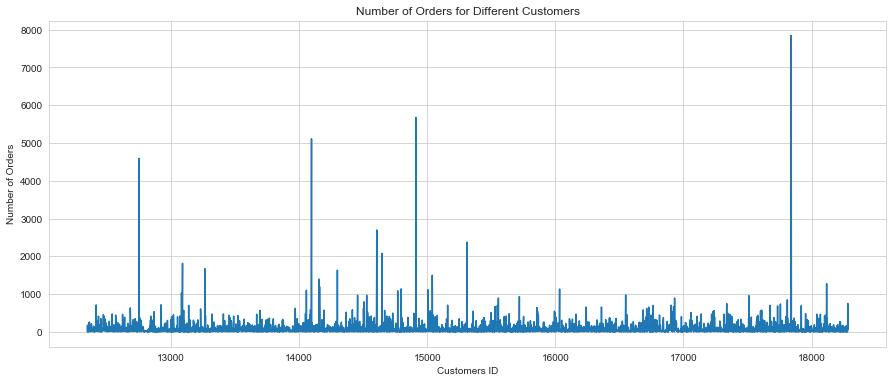

In [49]:
##visualize
orders = eco_new.groupby(by=['cust_id','country'],as_index=False)['invoice_num'].count()
plt.subplots(figsize=(15,6))
plt.plot(orders.cust_id,orders.invoice_num)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for Different Customers')
plt.show()

In [50]:
##sort data for the top5 customers with most orders
orders.sort_values(by='invoice_num',ascending=False).head()

,cust_id,country,invoice_num
4019,17841,United Kingdom,7847
1888,14911,EIRE,5677
1298,14096,United Kingdom,5111
334,12748,United Kingdom,4596
1670,14606,United Kingdom,2700


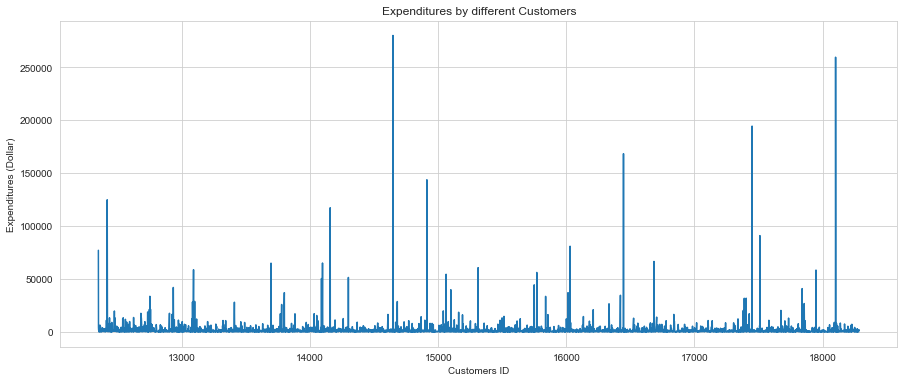

In [53]:
##expenditures by customers
expenditures = eco_new.groupby(by=['cust_id','country'],as_index=False)['amount_spent'].sum()
plt.subplots(figsize=(15,6))
plt.plot(expenditures.cust_id, expenditures.amount_spent)
plt.xlabel('Customers ID')
plt.ylabel('Expenditures (Dollar)')
plt.title('Expenditures by different Customers')
plt.show()

In [56]:
##the Top5 of expenditures
expenditures.sort_values(by='amount_spent',ascending=False).head()

,cust_id,country,amount_spent
1698,14646,Netherlands,280206.02
4210,18102,United Kingdom,259657.30
3737,17450,United Kingdom,194550.79
3017,16446,United Kingdom,168472.50
1888,14911,EIRE,143825.06


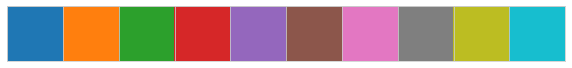

In [57]:
##colors available
sns.palplot(color)

In [58]:
eco_new.head()

,invoice_num,invoice_date,year_month,month,day,hour,stock_code,description,quantity,unit_price,amount_spent,cust_id,country
0,536365,2010-12-01 08:26:00,201012,12,3,8,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,201012,12,3,8,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,201012,12,3,8,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,201012,12,3,8,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,201012,12,3,8,84029E,red woolly hottie white heart.,6,3.39,20.34,17850,United Kingdom


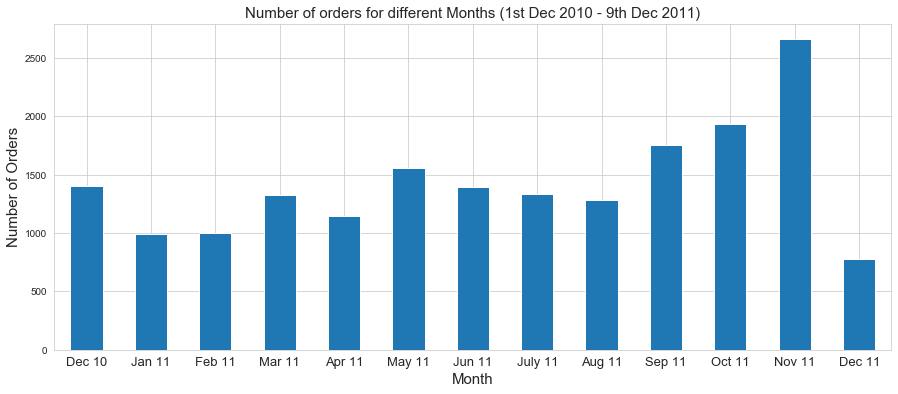

In [65]:
##number of orders per month
monthly_order_num = eco_new.groupby(by='invoice_num')['year_month'].unique().value_counts().sort_index().plot('bar',color=color[0],figsize=(15,6))
monthly_order_num.set_xlabel('Month', fontsize=15)
monthly_order_num.set_ylabel('Number of Orders',fontsize=15)
monthly_order_num.set_title('Number of orders for different Months (1st Dec 2010 - 9th Dec 2011)',fontsize=15)
monthly_order_num.set_xticklabels(('Dec 10','Jan 11','Feb 11','Mar 11','Apr 11','May 11','Jun 11','July 11','Aug 11','Sep 11','Oct 11','Nov 11','Dec 11'), rotation='horizontal', fontsize=13)
plt.show()

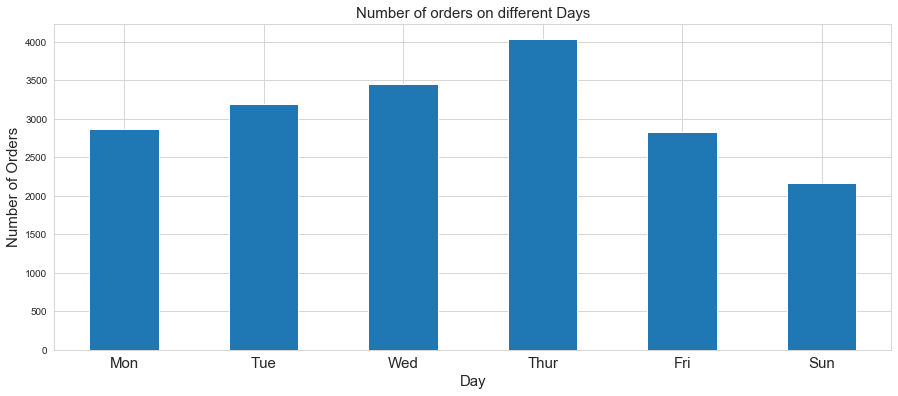

In [73]:
eco_new.groupby(by='invoice_num')['day'].unique().value_counts().sort_index()
daily_order_num = eco_new.groupby(by='invoice_num')['day'].unique().value_counts().sort_index().plot('bar',color=color[0],figsize=(15,6))
daily_order_num.set_xlabel('Day', fontsize=15)
daily_order_num.set_ylabel('Number of Orders',fontsize=15)
daily_order_num.set_title('Number of orders on different Days',fontsize=15)
daily_order_num.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)
plt.show()

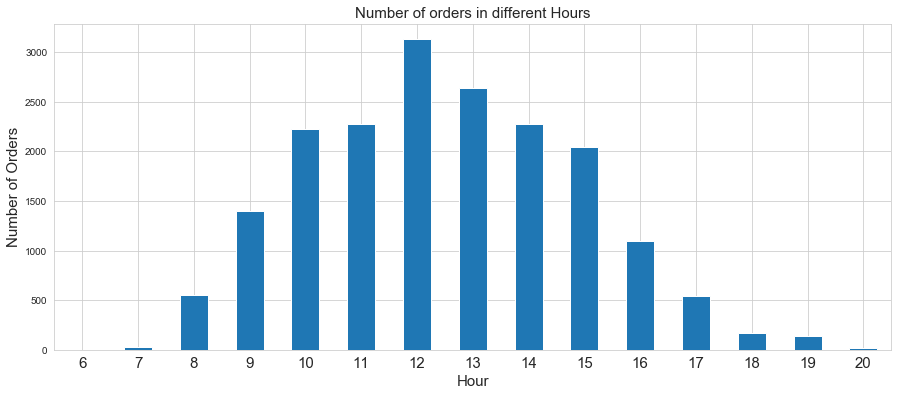

In [76]:
##number of orders per hour
eco_new.groupby(by='invoice_num')['hour'].unique().value_counts().iloc[:-1].sort_index()
hourly_order_num = eco_new.groupby(by='invoice_num')['hour'].unique().value_counts().iloc[:-1].sort_index().plot('bar',color=color[0],figsize=(15,6))
hourly_order_num.set_xlabel('Hour', fontsize=15)
hourly_order_num.set_ylabel('Number of Orders',fontsize=15)
hourly_order_num.set_title('Number of orders in different Hours',fontsize=15)
hourly_order_num.set_xticklabels((range(6,21)), rotation='horizontal', fontsize=15)
plt.show()

In [77]:
##look at Unit Price
eco_new.unit_price.describe()

count    397924.000000
mean          3.116174
std          22.096788
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: unit_price, dtype: float64

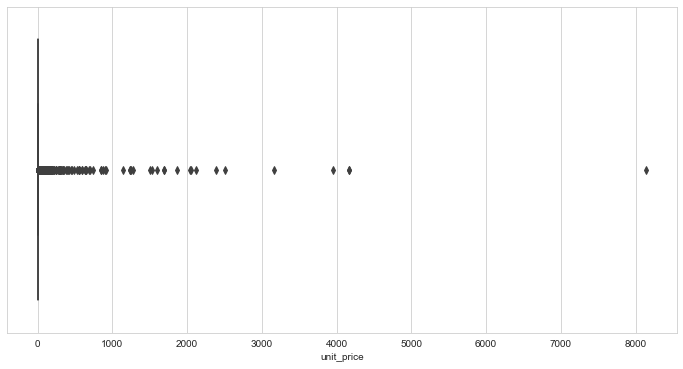

In [78]:
##Unit Price distribution
plt.subplots(figsize=(12,6))
sns.boxplot(eco_new.unit_price)
plt.show()

In [79]:
##look at free commodities
eco_free = eco_new[eco_new.unit_price==0]

eco_free.head()

,invoice_num,invoice_date,year_month,month,day,hour,stock_code,description,quantity,unit_price,amount_spent,cust_id,country
9302,537197,2010-12-05 14:02:00,201012,12,7,14,22841,round cake tin vintage green,1,0.0,0.0,12647,Germany
33576,539263,2010-12-16 14:36:00,201012,12,4,14,22580,advent calendar gingham sack,4,0.0,0.0,16560,United Kingdom
40089,539722,2010-12-21 13:45:00,201012,12,2,13,22423,regency cakestand 3 tier,10,0.0,0.0,14911,EIRE
47068,540372,2011-01-06 16:41:00,201101,1,4,16,22090,paper bunting retrospot,24,0.0,0.0,13081,United Kingdom
47070,540372,2011-01-06 16:41:00,201101,1,4,16,22553,plasters in tin skulls,24,0.0,0.0,13081,United Kingdom


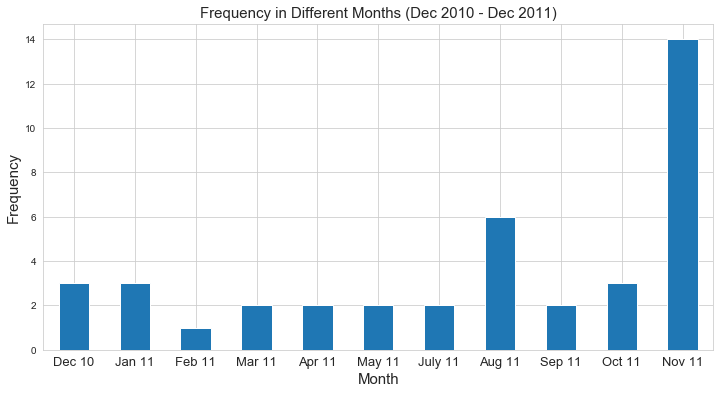

In [82]:
eco_free.year_month.value_counts().sort_index()

free = eco_free.year_month.value_counts().sort_index().plot('bar',figsize=(12,6),color=color[0])
free.set_xlabel('Month',fontsize=15)
free.set_ylabel('Frequency',fontsize=15)
free.set_title('Frequency in Different Months (Dec 2010 - Dec 2011)',fontsize=15)
free.set_xticklabels(('Dec 10','Jan 11','Feb 11','Mar 11','Apr 11','May 11','July 11','Aug 11','Sep 11','Oct 11','Nov 11'), rotation='horizontal', fontsize=13)
plt.show()

In [ ]:
##It is not clear why the company gives free items to certain customers, but on average,
##the company gives free items 2 to 4 times every month, except in Nov 2011.

In [83]:
#Patterns based on different countries
eco_new.head()

,invoice_num,invoice_date,year_month,month,day,hour,stock_code,description,quantity,unit_price,amount_spent,cust_id,country
0,536365,2010-12-01 08:26:00,201012,12,3,8,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,201012,12,3,8,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,201012,12,3,8,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,201012,12,3,8,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,201012,12,3,8,84029E,red woolly hottie white heart.,6,3.39,20.34,17850,United Kingdom


In [84]:
##number of orders from each country
orders_by_country = eco_new.groupby(by='country')['invoice_num'].count().sort_values()

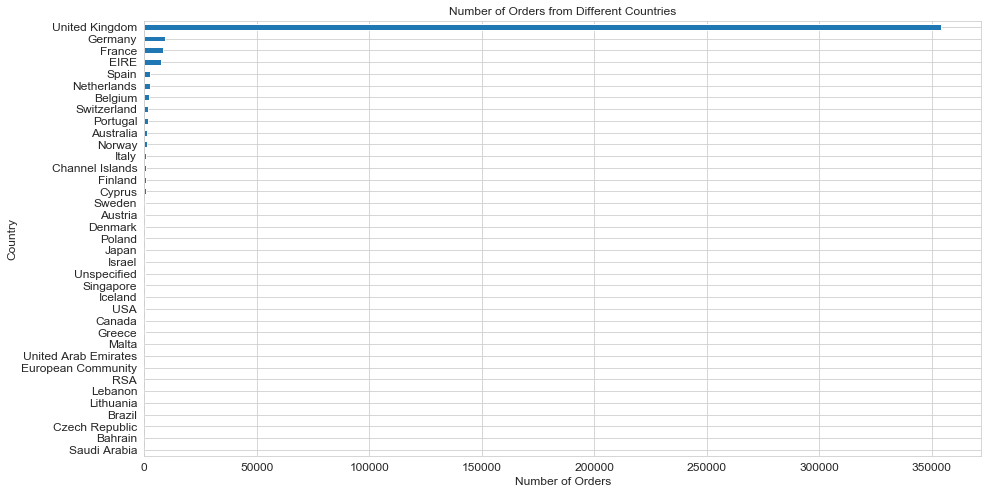

In [85]:
##plot number of unique customers in each country (including UK)
plt.subplots(figsize=(15,8))
orders_by_country.plot('barh',fontsize=12,color=color[0])
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country',fontsize=12)
plt.title('Number of Orders from Different Countries',fontsize=12)
plt.show()

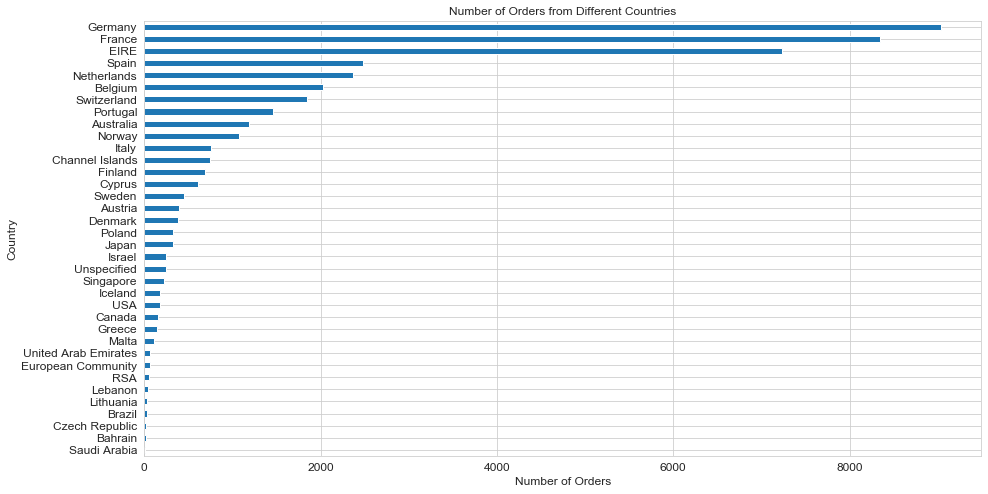

In [86]:
##plot number of unique customers in each country (excluding UK)
orders_by_country = eco_new.groupby(by='country')['invoice_num'].count().sort_values()
del orders_by_country['United Kingdom']
plt.subplots(figsize=(15,8))
orders_by_country.plot('barh',fontsize=12,color=color[0])
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country',fontsize=12)
plt.title('Number of Orders from Different Countries',fontsize=12)
plt.show()

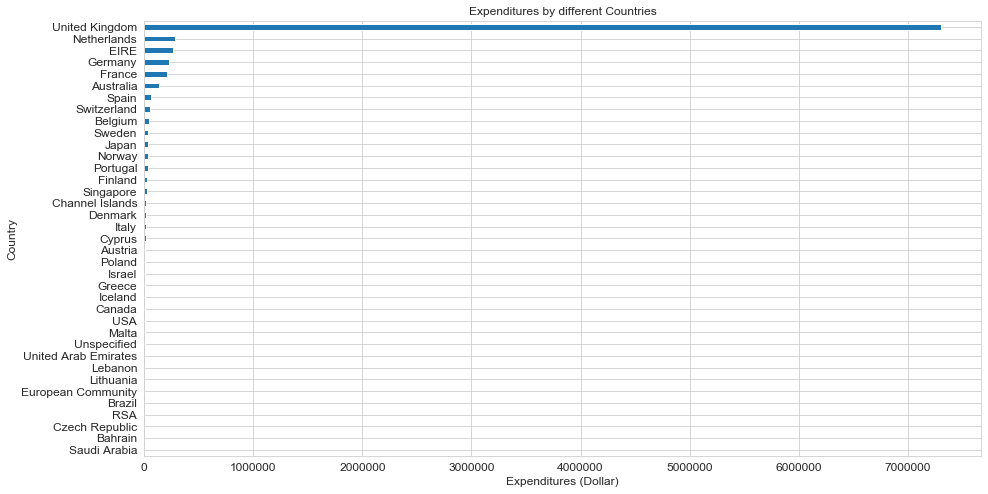

In [88]:
#Expenditures by country (including UK)
exp_by_country = eco_new.groupby(by='country')['amount_spent'].sum().sort_values()

plt.subplots(figsize=(15,8))
exp_by_country.plot('barh', fontsize=12, color=color[0])
plt.xlabel('Expenditures (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Expenditures by different Countries', fontsize=12)
plt.show()

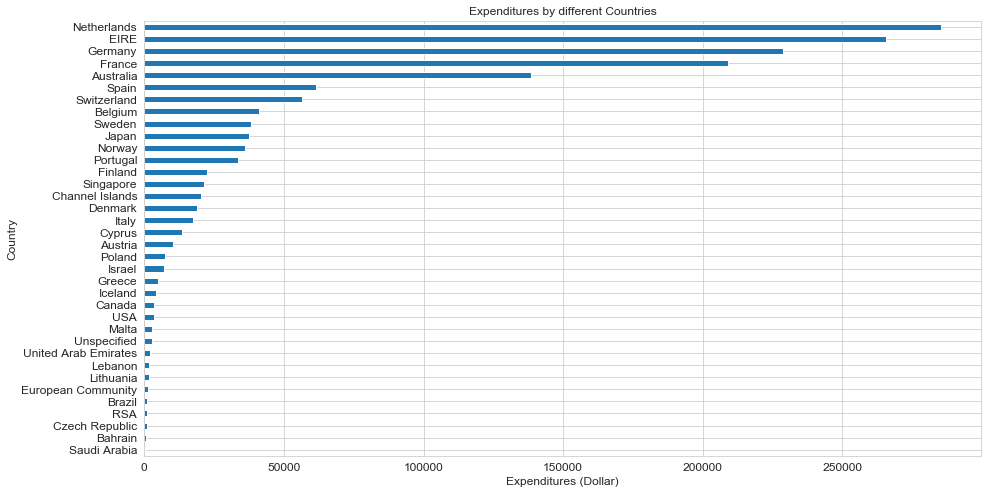

In [89]:
#Expenditures by country (excluding UK)
exp_by_country = eco_new.groupby(by='country')['amount_spent'].sum().sort_values()
del exp_by_country['United Kingdom']

plt.subplots(figsize=(15,8))
exp_by_country.plot('barh', fontsize=12, color=color[0])
plt.xlabel('Expenditures (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Expenditures by different Countries', fontsize=12)
plt.show()

In [ ]:
##people in Netherland spend large amount with a small number of orders
